# B1 Render image


In this notebook we use the synthetic package to render a custom galaxy catalog into an image using the galsim wrapper


## Objectives

    1 Learn to turn a galaxy catalog into an image
    
    2 consider which column in the galaxy catalo

    3 Turn fits images into color composites


## Setup

This notebook relies on the:

    * synthetic package & dependencies
    
    * DC2 cutotut data files on disk


## Output

    * fits image in g, r, i band
    
    * color composite image for visualization
    
The output files are placed in the `./data/` folder

## Contact

In case of questions, contact me at t.varga@physik.lmu.de

In [9]:
import fitsio as fio
import numpy as np
import pandas as pd
import pickle as pickle
import copy
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import images # package from erin sheldon

import synthetic.tools as tools
import synthetic.render.frame as frame


# Load galaxy catalog selected from DC2

In [19]:
# File path for input DC2 files
in_path = "/e/ocean1/users/vargatn/LSST/DC2_1.1.4/" 
# output path for mock image, be sure to place it into 
out_path = "data/"

Now we load an arbitrary chunk of DC2, in this case orderedd by a list of healpix pixel cutotuts.

In [20]:
fnames = glob.glob(in_path + "*pixel*h5")
pixels = np.array([int(tmp.split("-")[-1].split(".")[0]) for tmp in fnames])
pixel_id = 0

alltable = pd.read_hdf(fnames[pixel_id], key='data')
ra_cen = np.mean(alltable["ra"])
dec_cen = np.mean(alltable["dec"])

Most galaxies in the catalog are either too faint, or would not fit into the image we are about to render, for this reason we simply cut them out

In [21]:
pad = 0.17 # degree
mag_max = 25 # magniture

#This is just a simple rough cut to exclude most objects
ii = (np.abs(alltable["ra"] - ra_cen) < pad) & (np.abs(alltable["dec"] - dec_cen) < pad) & (alltable['mag_i'] < mag_max)
table = alltable[ii]
ra = (table["ra"] - ra_cen) * 60. 
dec = (table["dec"] - dec_cen) * 60.

In [22]:
mock_catalog = make_mock(table, sky_center=(ra_cen, dec_cen))

Text(0, 0.5, 'DEC [deg]')

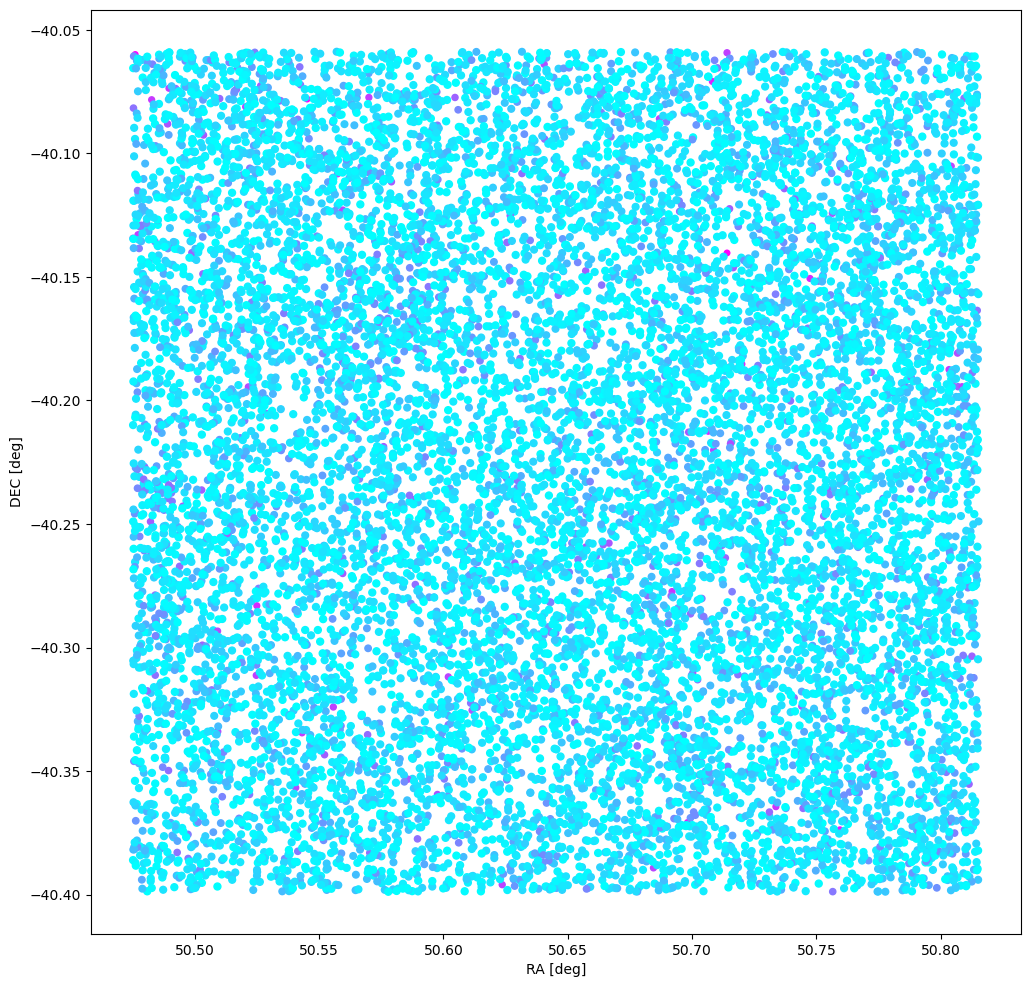

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)


ax.scatter(mock_catalog["RA"], mock_catalog["DEC"], c=mock_catalog['MAG_I'], s=mock_catalog['MAG_I'],
           cmap=plt.cm.cool_r)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")

In [25]:
stds = np.array([2.509813, 5.192254, 8.36335, 15.220351]) / 1.3
for i, band in enumerate(("g", "r", "i")):
    name = out_path + 'test_canvas_grid_' + band
    print(name)
    fr = frame.Frame(mock_catalog.to_records(), band=band, name=name,
                     center=(ra_cen, dec_cen), noise_std=stds[i], canvas_size=5000)
    fr.render() 

/e/ocean1/users/vargatn/LSST/SYNTHETIC/test_canvas_grid_g
starting xshear calculations in 100 processes


Process ForkPoolWorker-74:
Process ForkPoolWorker-98:
Process ForkPoolWorker-100:
Process ForkPoolWorker-92:
Process ForkPoolWorker-47:
Process ForkPoolWorker-69:
Process ForkPoolWorker-97:
Process ForkPoolWorker-82:
Process ForkPoolWorker-99:
Process ForkPoolWorker-65:
Process ForkPoolWorker-95:
Process ForkPoolWorker-90:
Process ForkPoolWorker-30:
Process ForkPoolWorker-83:
Process ForkPoolWorker-44:
Process ForkPoolWorker-25:
Process ForkPoolWorker-42:
Process ForkPoolWorker-6:
Process ForkPoolWorker-93:
Process ForkPoolWorker-84:
Process ForkPoolWorker-77:
Process ForkPoolWorker-89:
Process ForkPoolWorker-38:
Process ForkPoolWorker-66:
Process ForkPoolWorker-81:
Process ForkPoolWorker-39:
Process ForkPoolWorker-5:
Process ForkPoolWorker-57:
Process ForkPoolWorker-91:
Process ForkPoolWorker-19:
Process ForkPoolWorker-88:
Process ForkPoolWorker-37:
Process ForkPoolWorker-31:
Process ForkPoolWorker-73:
Process ForkPoolWorker-61:
Process ForkPoolWorker-3:
Process ForkPoolWorker-64:
Pro

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/en

  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/

  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessi

  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
AttributeError: 'list' object has no attribute 'sum'
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 127, in worker
    put((job, i, result))
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  Fi

  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/pytho

  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/moon/vargatn

Caught KeyboardInterrupt, terminating workers


KeyboardInterrupt: 

In [19]:
ims_all = []
for i, band in enumerate(("g", "r", "i")):
    name = out_path + 'test_canvas_grid_' + band + ".fits"
    tmp = fio.read(name)
    print(name)
    ims_all.append(tmp)

/e/ocean1/users/vargatn/LSST/SYNTHETIC/test_canvas_grid_g.fits
/e/ocean1/users/vargatn/LSST/SYNTHETIC/test_canvas_grid_r.fits
/e/ocean1/users/vargatn/LSST/SYNTHETIC/test_canvas_grid_i.fits


0.9391123056411743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


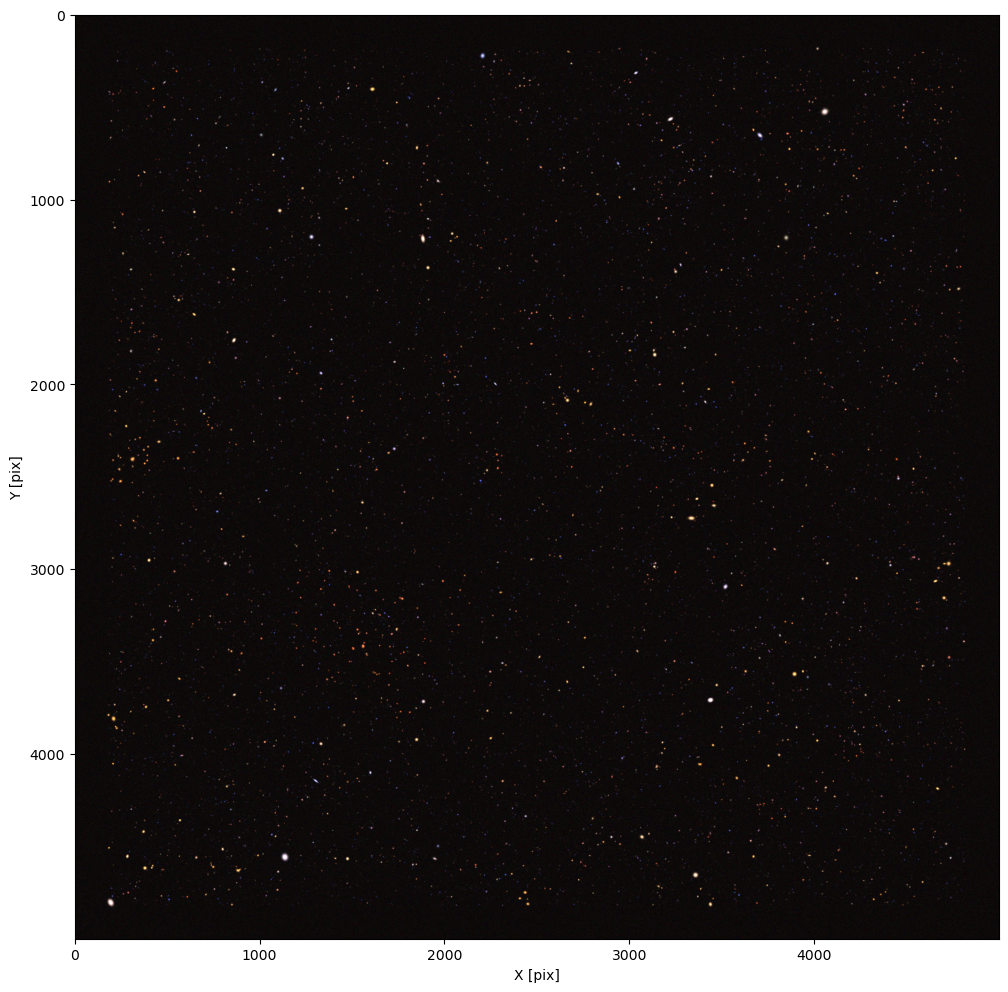

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
factor = 0.01
scales = np.array([1., 1.2, 2.5]) * factor
nonlinear = 0.12
clip = 0

pad = 0
obs_im = images.get_color_image(ims_all[2],
                                ims_all[1],
                                ims_all[0],
                                nonlinear=nonlinear, clip=clip, scales=scales)  
print(obs_im.max())
ax.imshow(obs_im * 2, origin='upper')

# ax.set_title("cluster + field rendered together")

ax.set_xlabel("X [pix]")
ax.set_ylabel("Y [pix]")
fig.savefig("data/dc2_hp.png", bbox_inches='tight')

In [21]:
ihmaxes = np.argsort(table["halo_mass"])[::-1]

In [22]:
masses = table["halo_mass"][table["is_central"]].iloc[np.argsort(table["halo_mass"][table["is_central"]])[-10:]]
ras = table["ra"][table["is_central"]].iloc[np.argsort(table["halo_mass"][table["is_central"]])[-10:]]
decs = table["dec"][table["is_central"]].iloc[np.argsort(table["halo_mass"][table["is_central"]])[-10:]]
xh, yh = radec2xy(ras, decs, sky_center=(ra_cen, dec_cen))

In [23]:
marker_sizes = (np.log10(masses).values - 12.6) ** 4 * 30

0.9391123056411743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


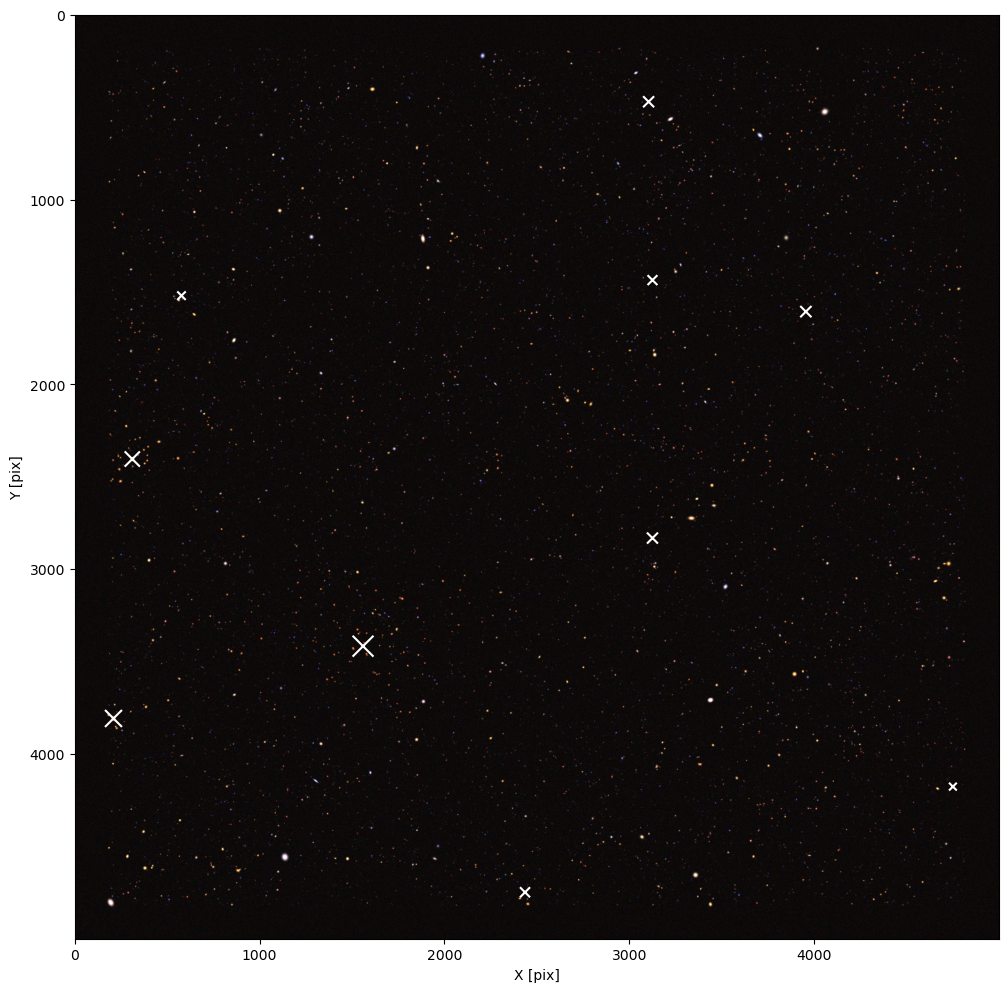

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
factor = 0.01
scales = np.array([1., 1.2, 2.5]) * factor
nonlinear = 0.12
clip = 0

pad = 0
obs_im = images.get_color_image(ims_all[2],# + ims_icl[2] + noises[2] + pad,
                                ims_all[1],# + ims_icl[1] + noises[1] + pad,
                                ims_all[0],# + ims_icl[0] + noises[0] + pad,
                                nonlinear=nonlinear, clip=clip, scales=scales)  
print(obs_im.max())
ax.imshow(obs_im * 2, origin='upper')
ax.scatter(xh[::-1], yh[::-1], s=marker_sizes[::-1], color="white", marker="x")

# ax.set_title("cluster + field rendered together")

ax.set_xlabel("X [pix]")
ax.set_ylabel("Y [pix]")
fig.savefig("data/dc2_hp_halos_in_FOV.png", bbox_inches='tight')